In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
import time
import datetime
import warnings                  
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
warnings.filterwarnings("ignore")

# Handling Data - Group by Month - etc

In [2]:
df = pd.read_csv('lsiowa_cleaned_iclotl_bin.csv')
df = df[['date','category_sale', 'category_volume', 'sale_dollars', 'volume_sold_gallons', 'item_sale']]
df['date'] = df['date'].str[:-3]

In [3]:
dfscw = df[['date', 'sale_dollars']][df['category_sale']=='CANADIAN WHISKIES']
dfssr = df[['date', 'sale_dollars']][df['category_sale']=='SPICED RUM']
dfsav = df[['date', 'sale_dollars']][df['category_sale']=='AMERICAN VODKAS']

dfvav = df[['date', 'volume_sold_gallons']][df['category_volume']=='AMERICAN VODKAS']
dfvcw = df[['date', 'volume_sold_gallons']][df['category_volume']=='CANADIAN WHISKIES']
dfvsr = df[['date', 'volume_sold_gallons']][df['category_volume']=='SPICED RUM']

dfvol = df[['date', 'volume_sold_gallons']]

In [4]:
dfscw = dfscw.groupby('date').sum()
dfssr = dfssr.groupby('date').sum()
dfsav = dfsav.groupby('date').sum()
dfvav = dfvav.groupby('date').sum()
dfvcw = dfvcw.groupby('date').sum()
dfvsr = dfvsr.groupby('date').sum()

dfvol = dfvol.groupby('date').sum()

**To Date-Time**

In [5]:
dfscw.index = pd.to_datetime(dfscw.index)
dfssr.index = pd.to_datetime(dfssr.index)
dfsav.index = pd.to_datetime(dfsav.index)
dfvav.index = pd.to_datetime(dfvav.index)
dfvcw.index = pd.to_datetime(dfvcw.index)
dfvsr.index = pd.to_datetime(dfvsr.index)

dfvol.index = pd.to_datetime(dfvol.index)

In [6]:
dfscw = dfscw.reset_index()
dfscw['date'] = dfscw['date'].apply(lambda x: x.strftime('%Y-%m'))
dfscw.set_index('date', inplace=True)

dfssr = dfssr.reset_index()
dfssr['date'] = dfssr['date'].apply(lambda x: x.strftime('%Y-%m'))
dfssr.set_index('date', inplace=True)

dfsav = dfsav.reset_index()
dfsav['date'] = dfsav['date'].apply(lambda x: x.strftime('%Y-%m'))
dfsav.set_index('date', inplace=True)

dfvav = dfvav.reset_index()
dfvav['date'] = dfvav['date'].apply(lambda x: x.strftime('%Y-%m'))
dfvav.set_index('date', inplace=True)

dfvcw = dfvcw.reset_index()
dfvcw['date'] = dfvcw['date'].apply(lambda x: x.strftime('%Y-%m'))
dfvcw.set_index('date', inplace=True)

dfvsr = dfvsr.reset_index()
dfvsr['date'] = dfvsr['date'].apply(lambda x: x.strftime('%Y-%m'))
dfvsr.set_index('date', inplace=True)


dfvol = dfvol.reset_index()
dfvol['date'] = dfvol['date'].apply(lambda x: x.strftime('%Y-%m'))
dfvol.set_index('date', inplace=True)

# Split Data

In [8]:
train1=dfscw.loc[:'2020-09']
test1=dfscw.loc['2020-09':]

train2=dfssr.loc['2015-01':'2020-09']
test2=dfssr.loc['2020-09':]

train3=dfsav.loc['2017-01':'2020-09']
test3=dfsav.loc['2020-09':]

train4=dfvav.loc['2018-01':'2020-09']
test4=dfvav.loc['2020-09':]

train5=dfvcw.loc['2016-01':'2020-09']
test5=dfvcw.loc['2020-09':]

train6=dfvsr.loc['2015-01':'2020-09']
test6=dfvsr.loc['2020-09':]


trainvol=dfvol.loc[:'2020-09']
testvol=dfvol.loc['2020-09':]

In [9]:
ori1 = dfscw[["sale_dollars"]]
train1 = train1[["sale_dollars"]]
test1 = test1[["sale_dollars"]]

ori2 = dfssr[["sale_dollars"]]
train2 = train2[["sale_dollars"]]
test2 = test2[["sale_dollars"]]

ori3 = dfsav[["sale_dollars"]]
train3 = train3[["sale_dollars"]]
test3 = test3[["sale_dollars"]]

ori4 = dfvav[["volume_sold_gallons"]]
train4 = train4[["volume_sold_gallons"]]
test4 = test4[["volume_sold_gallons"]]

ori5 = dfvcw[["volume_sold_gallons"]]
train5 = train5[["volume_sold_gallons"]]
test5 = test5[["volume_sold_gallons"]]

ori6 = dfvsr[["volume_sold_gallons"]]
train6 = train6[["volume_sold_gallons"]]
test6 = test6[["volume_sold_gallons"]]


orivol = dfvol[["volume_sold_gallons"]]
trainvol = trainvol[["volume_sold_gallons"]]
testvol = testvol[["volume_sold_gallons"]]

# Check Differencing, Check Plot, etc

In [10]:
train_diff1 = train1.diff()
train_diff1_2 = train1.diff().diff()

train_diff2 = train2.diff()
train_diff2_2 = train2.diff().diff()

train_diff3 = train3.diff()
train_diff3_2 = train3.diff().diff()

train_diff4 = train4.diff()
train_diff4_2 = train4.diff().diff()

train_diff5 = train5.diff()
train_diff5_2 = train5.diff().diff()

train_diff6 = train6.diff()
train_diff6_2 = train6.diff().diff()


trainvol_diff = trainvol.diff()
trainvol_diff_2 = trainvol.diff().diff()


1


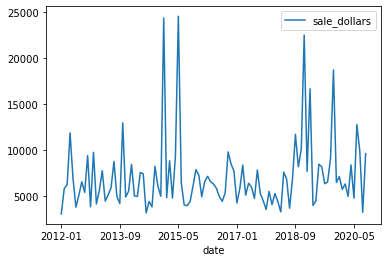

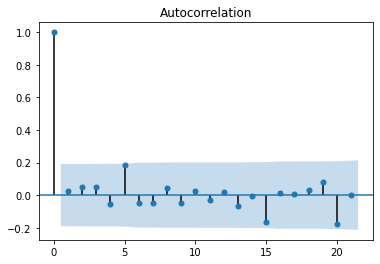

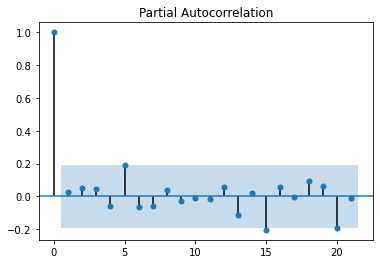

2


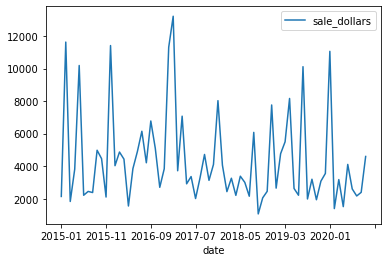

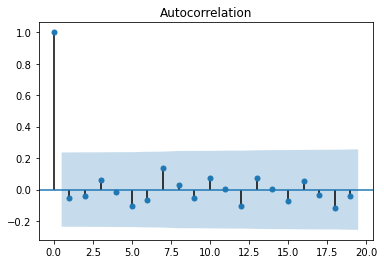

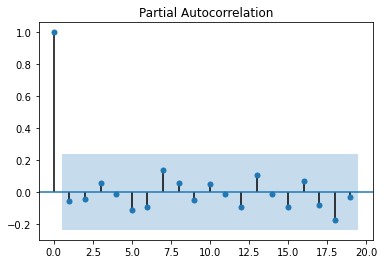

3


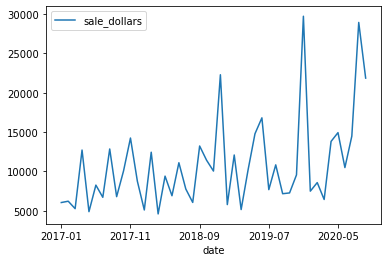

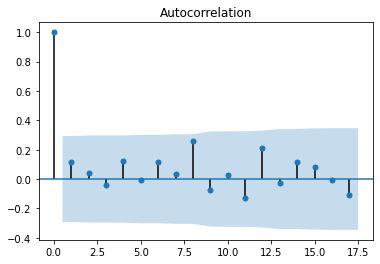

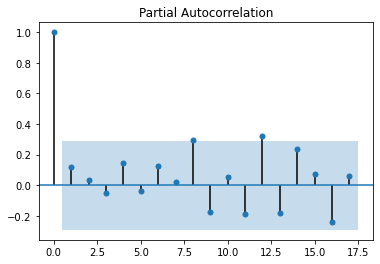

4


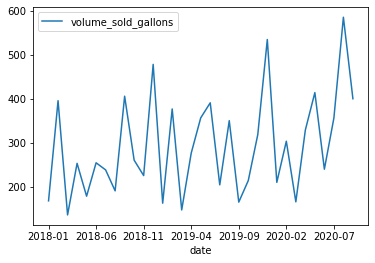

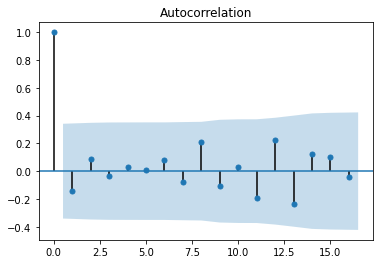

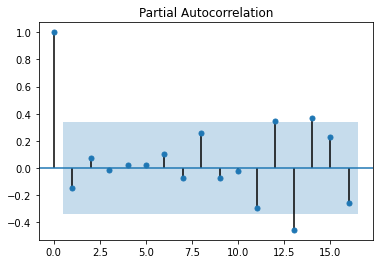

5


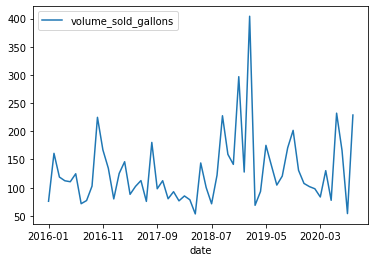

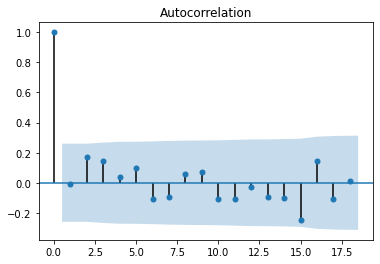

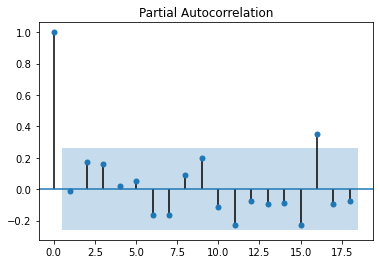

6


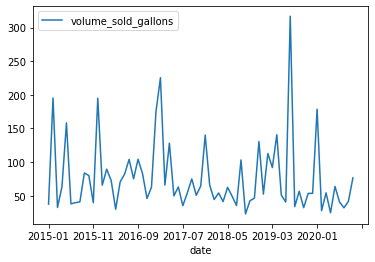

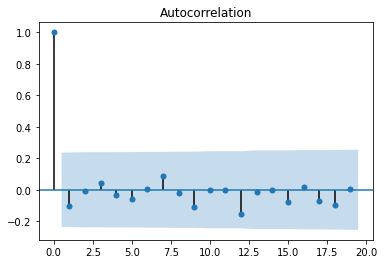

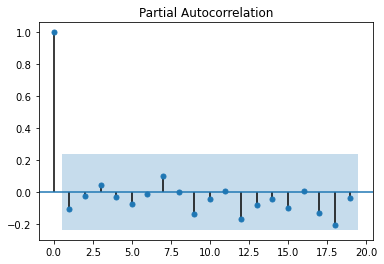

Train Vol


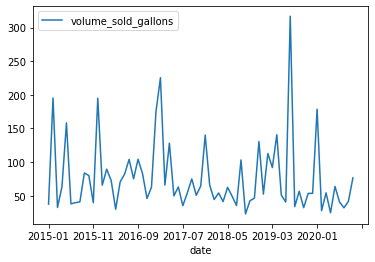

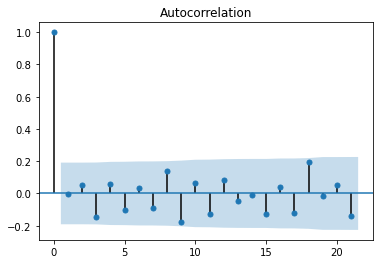

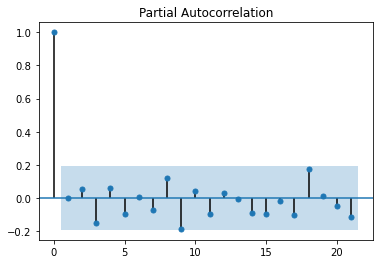

In [11]:
print(1)
train1.plot()
plot_acf(train1)
plot_pacf(train1)
plt.show()

print(2)
train2.plot()
plot_acf(train2)
plot_pacf(train2)
plt.show()

print(3)
train3.plot()
plot_acf(train3)
plot_pacf(train3)
plt.show()

print(4)
train4.plot()
plot_acf(train4)
plot_pacf(train4)
plt.show()

print(5)
train5.plot()
plot_acf(train5)
plot_pacf(train5)
plt.show()

print(6)
train6.plot()
plot_acf(train6)
plot_pacf(train6)
plt.show()

print('Train Vol')
train6.plot()
plot_acf(trainvol)
plot_pacf(trainvol)
plt.show()

**1st Differencing**

data1 (-9.530805731789497, 2.8943261177624583e-16, 3, 100, {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349}, 1768.9850361902932)


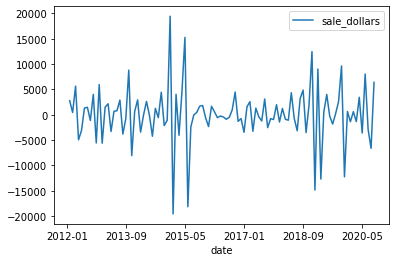

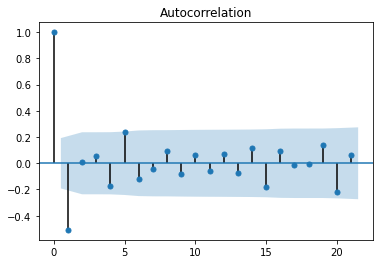

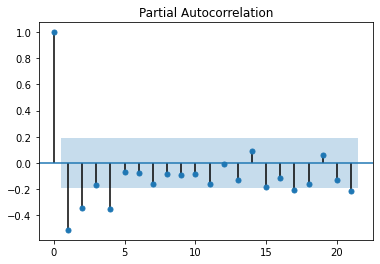

data2 (-7.904370894338668, 4.1040443376246745e-12, 2, 65, {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}, 1059.1419501947935)


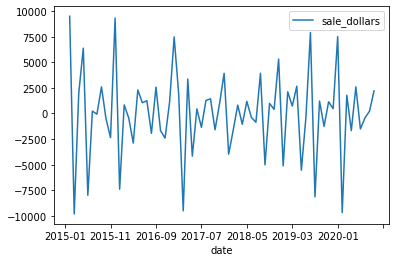

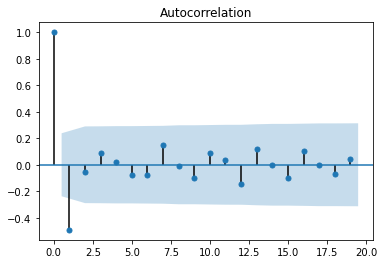

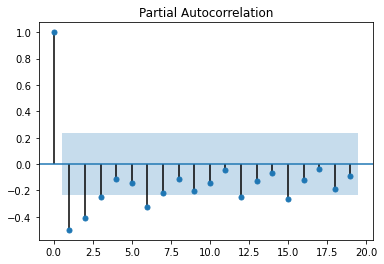

data3 (-2.2650067056406042, 0.18350242654865867, 10, 33, {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}, 672.9932943477763)


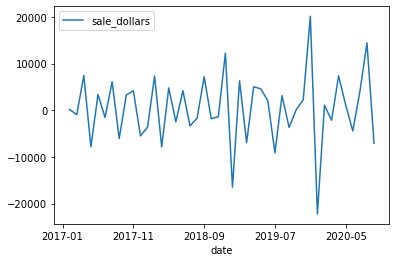

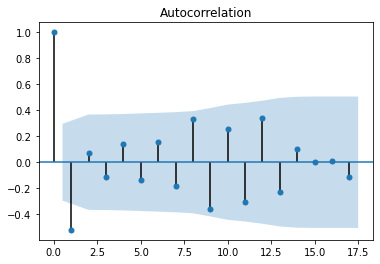

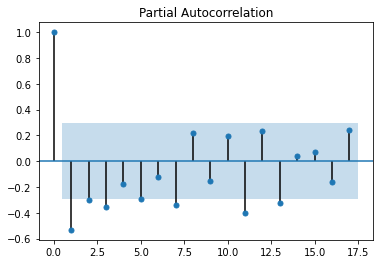

data4 (-2.47556199929896, 0.12153413604021457, 7, 24, {'1%': -3.7377092158564813, '5%': -2.9922162731481485, '10%': -2.635746736111111}, 265.7226222311854)


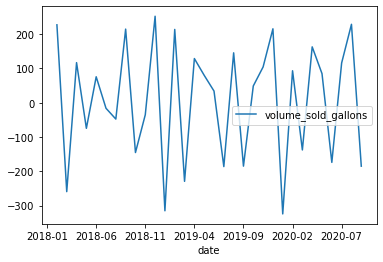

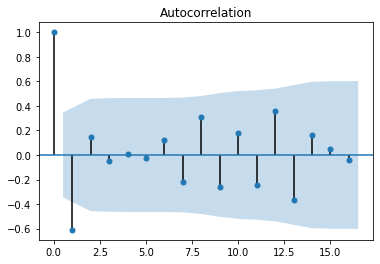

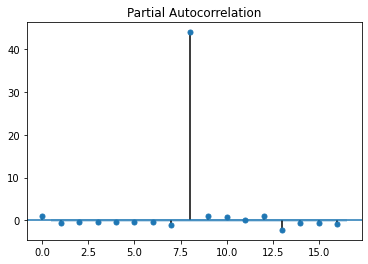

data5 (-9.28820502249535, 1.1993999023974695e-15, 1, 54, {'1%': -3.55770911573439, '5%': -2.9167703434435808, '10%': -2.59622219478738}, 501.58493773763036)


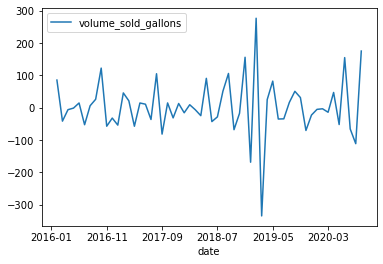

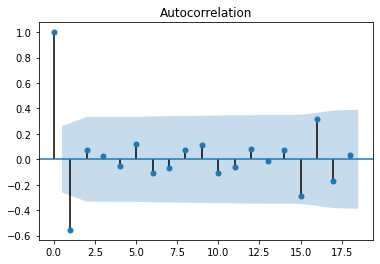

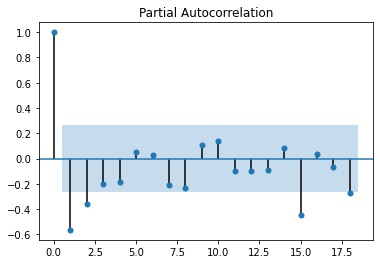

data6 (-5.907142979005628, 2.6919180634534606e-07, 4, 63, {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}, 621.557411003388)


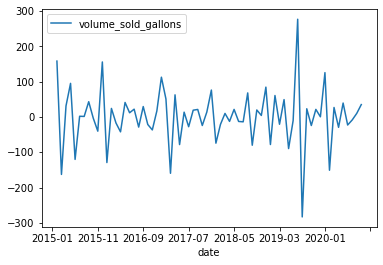

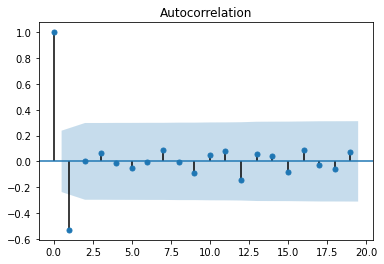

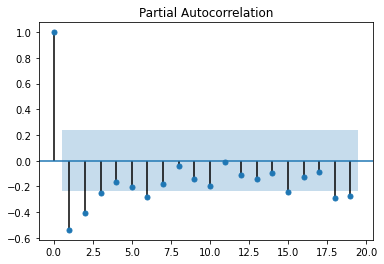

Train Vol (-6.956538200334961, 9.397379044861411e-10, 6, 97, {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176}, 1350.7532065862215)


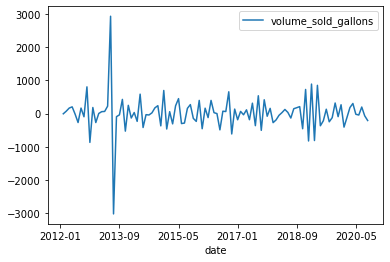

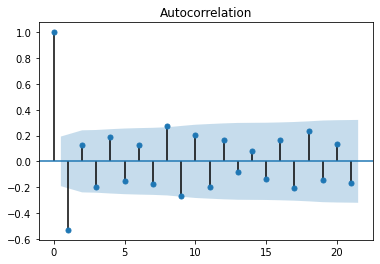

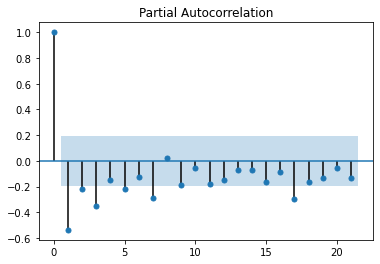

In [12]:
print('data1', adfuller(train_diff1.dropna()))
train_diff1.plot()
plot_acf(train_diff1.dropna())
plot_pacf(train_diff1.dropna())
plt.show()

print('data2', adfuller(train_diff2.dropna()))
train_diff2.plot()
plot_acf(train_diff2.dropna())
plot_pacf(train_diff2.dropna())
plt.show()

print('data3', adfuller(train_diff3.dropna()))
train_diff3.plot()
plot_acf(train_diff3.dropna())
plot_pacf(train_diff3.dropna())
plt.show()

print('data4', adfuller(train_diff4.dropna()))
train_diff4.plot()
plot_acf(train_diff4.dropna())
plot_pacf(train_diff4.dropna())
plt.show()

print('data5', adfuller(train_diff5.dropna()))
train_diff5.plot()
plot_acf(train_diff5.dropna())
plot_pacf(train_diff5.dropna())
plt.show()

print('data6', adfuller(train_diff6.dropna()))
train_diff6.plot()
plot_acf(train_diff6.dropna())
plot_pacf(train_diff6.dropna())
plt.show()


print('Train Vol', adfuller(trainvol_diff.dropna()))
trainvol_diff.plot()
plot_acf(trainvol_diff.dropna())
plot_pacf(trainvol_diff.dropna())
plt.show()

**2nd Differencing**

data1 (-6.002618732232607, 1.6436197147448422e-07, 12, 90, {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}, 1771.372568761573)


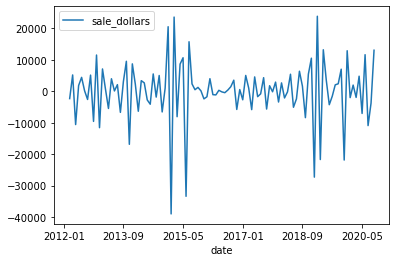

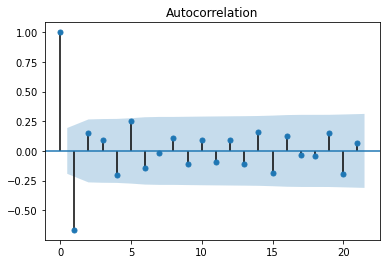

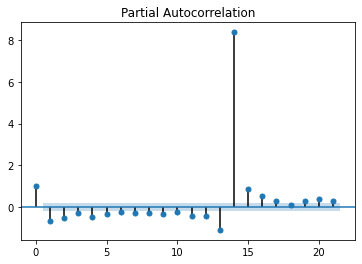

data2 (-5.632741535640792, 1.0801648927349537e-06, 9, 57, {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}, 1057.235976964746)


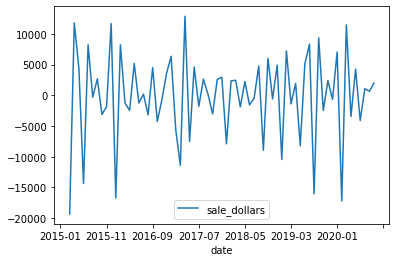

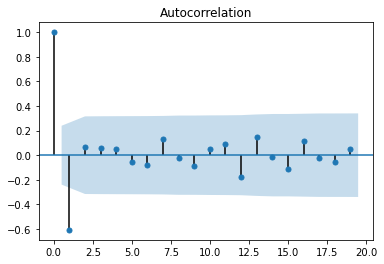

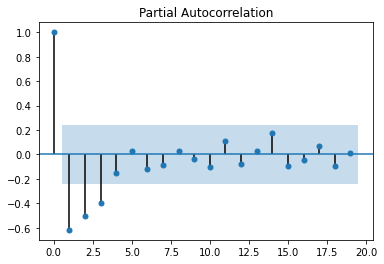

data3 (-2.2906788049321243, 0.1749918681994067, 10, 32, {'1%': -3.653519805908203, '5%': -2.9572185644531253, '10%': -2.6175881640625}, 658.9077082187886)


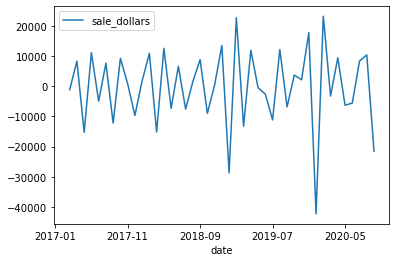

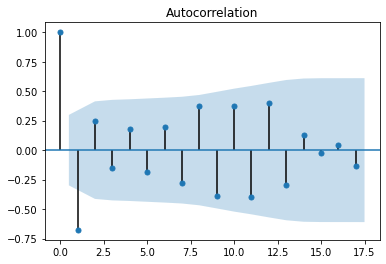

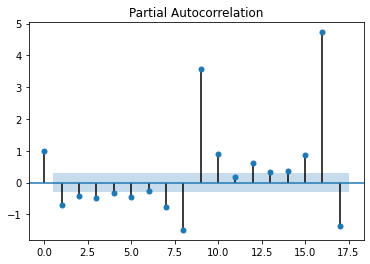

data4 (-3.452479904138845, 0.009294747940745607, 8, 22, {'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}, 270.2892954903685)


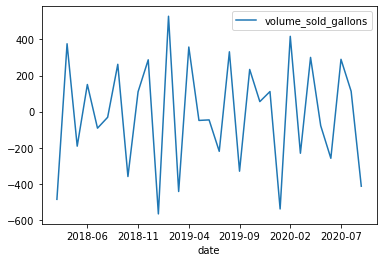

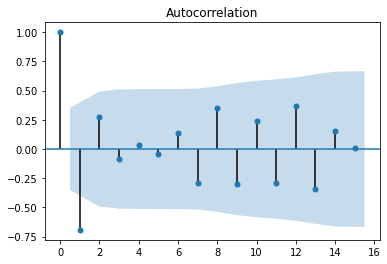

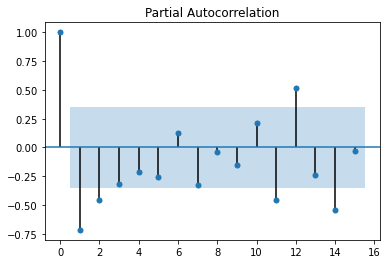

data5 (-5.201424666619582, 8.733392127446212e-06, 8, 46, {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}, 502.0238419377356)


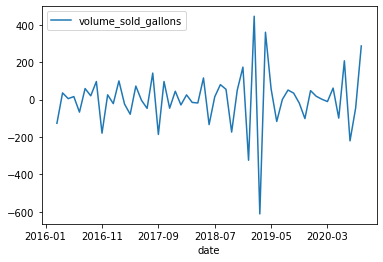

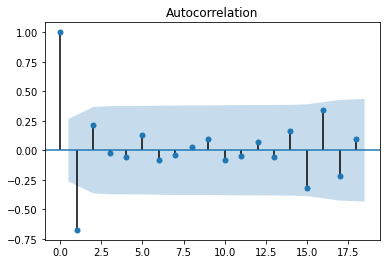

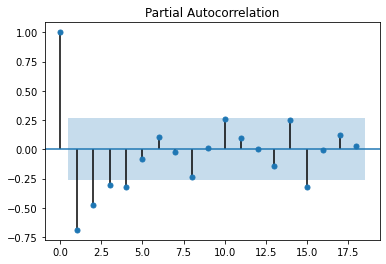

data6 (-5.396991178890307, 3.4368420618938725e-06, 9, 57, {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}, 627.0216451703776)


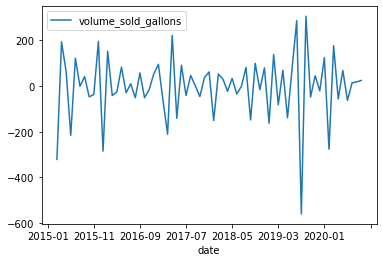

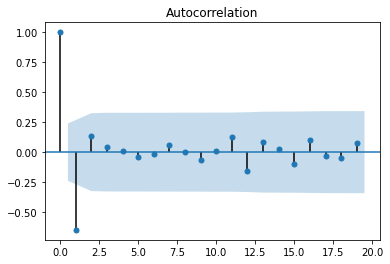

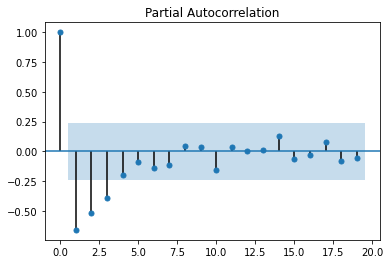

In [13]:
print('data1', adfuller(train_diff1_2.dropna()))
train_diff1_2.plot()
plot_acf(train_diff1_2.dropna())
plot_pacf(train_diff1_2.dropna())
plt.show()
print('data2', adfuller(train_diff2_2.dropna()))
train_diff2_2.plot()
plot_acf(train_diff2_2.dropna())
plot_pacf(train_diff2_2.dropna())
plt.show()
print('data3', adfuller(train_diff3_2.dropna()))
train_diff3_2.plot()
plot_acf(train_diff3_2.dropna())
plot_pacf(train_diff3_2.dropna())
plt.show()
print('data4', adfuller(train_diff4_2.dropna()))
train_diff4_2.plot()
plot_acf(train_diff4_2.dropna())
plot_pacf(train_diff4_2.dropna())
plt.show()
print('data5', adfuller(train_diff5_2.dropna()))
train_diff5_2.plot()
plot_acf(train_diff5_2.dropna())
plot_pacf(train_diff5_2.dropna())
plt.show()
print('data6', adfuller(train_diff6_2.dropna()))
train_diff6_2.plot()
plot_acf(train_diff6_2.dropna())
plot_pacf(train_diff6_2.dropna())
plt.show()

# AIC BIC Test, Determining P,Q

In [14]:
# Create empty list to store search results
order_aic_bic1=[]
order_aic_bic2=[]
order_aic_bic3=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      # create and fit ARMA(p,q) model
        model1 = SARIMAX(train1, seasonal_order=(p,1,q,12))
        model2 = SARIMAX(train2, order=(p,1,q))
        model3 = SARIMAX(train3, seasonal_order=(p,1,q,12))
        results1 = model1.fit()
        results2 = model2.fit()
        results3 = model3.fit()
        
        # Append order and results tuple
        order_aic_bic1.append((p,q, results1.aic, results1.bic))
        order_aic_bic2.append((p,q, results2.aic, results1.bic))
        order_aic_bic3.append((p,q, results3.aic, results1.bic))
        
# Construct DataFrame from order_aic_bic
order_df1 = pd.DataFrame(order_aic_bic1, 
                        columns=['p', 'q', 'AIC', 'BIC'])
order_df2 = pd.DataFrame(order_aic_bic2, 
                        columns=['p', 'q', 'AIC', 'BIC'])
order_df3 = pd.DataFrame(order_aic_bic3, 
                        columns=['p', 'q', 'AIC', 'BIC'])

print('data1')
print(order_df1.sort_values('AIC').head(2)) # Print order_df in order of increasing AIC
print(order_df1.sort_values('BIC').head(2)) # Print order_df in order of increasing BIC

print('data2')
print(order_df2.sort_values('AIC').head(2))
print(order_df2.sort_values('BIC').head(2))

print('data3')
print(order_df3.sort_values('AIC').head(2))
print(order_df3.sort_values('BIC').head(2))


data1
   p  q          AIC          BIC
5  1  2  1830.121588  1842.784586
7  2  1  1833.513994  1846.176992
   p  q          AIC          BIC
5  1  2  1830.121588  1842.784586
7  2  1  1833.513994  1846.176992
data2
   p  q          AIC          BIC
1  0  1  1283.852043  1848.246731
4  1  1  1285.738662  1852.060665
   p  q          AIC          BIC
5  1  2  1287.073609  1842.784586
7  2  1  1287.353660  1846.176992
data3
   p  q         AIC          BIC
0  0  0  671.216189  1874.490499
3  1  0  673.202697  1856.030118
   p  q         AIC          BIC
5  1  2  676.023831  1842.784586
7  2  1  676.272390  1846.176992


In [15]:
order_aic_bic4=[]
order_aic_bic5=[]
order_aic_bic6=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
        model4 = SARIMAX(train4, seasonal_order=(p,0,q,12))
        model5 = SARIMAX(train5, seasonal_order=(p,2,q,12))
        model6 = SARIMAX(train6, seasonal_order=(p,1,q,3))
        results4 = model4.fit()
        results5 = model5.fit()
        results6 = model6.fit()

        order_aic_bic4.append((p,q, results4.aic, results1.bic))
        order_aic_bic5.append((p,q, results5.aic, results1.bic))
        order_aic_bic6.append((p,q, results6.aic, results1.bic))

order_df4 = pd.DataFrame(order_aic_bic4, 
                        columns=['p', 'q', 'AIC', 'BIC'])
order_df5 = pd.DataFrame(order_aic_bic5, 
                        columns=['p', 'q', 'AIC', 'BIC'])
order_df6 = pd.DataFrame(order_aic_bic6, 
                        columns=['p', 'q', 'AIC', 'BIC'])

print('data4')
print(order_df4.sort_values('AIC').head(2))
print(order_df4.sort_values('BIC').head(2))

print('data5')
print(order_df5.sort_values('AIC').head(2))
print(order_df5.sort_values('BIC').head(2))

print('data6')
print(order_df6.sort_values('AIC').head(2))
print(order_df6.sort_values('BIC').head(2))

data4
   p  q         AIC          BIC
3  1  0  426.945824  1850.823545
1  0  1  428.827143  1850.823545
   p  q         AIC          BIC
0  0  0  436.092236  1850.823545
1  0  1  428.827143  1850.823545
data5
   p  q         AIC          BIC
6  2  0  417.999408  1850.823545
2  0  2  419.253322  1850.823545
   p  q         AIC          BIC
0  0  0  434.770730  1850.823545
1  0  1  422.787208  1850.823545
data6
   p  q         AIC          BIC
1  0  1  730.003309  1850.823545
4  1  1  731.717879  1850.823545
   p  q         AIC          BIC
0  0  0  758.368338  1850.823545
1  0  1  730.003309  1850.823545


In [81]:
order_aic_bicvol=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
        modelvol = SARIMAX(trainvol, seasonal_order=(p,0,q,12))
        resultsvol = modelvol.fit()

        order_aic_bicvol.append((p,q, resultsvol.aic, resultsvol.bic))

order_dfvol = pd.DataFrame(order_aic_bicvol, 
                        columns=['p', 'q', 'AIC', 'BIC'])

print('data vol')
print(order_dfvol.sort_values('AIC').head(2))
print(order_dfvol.sort_values('BIC').head(2))


data vol
   p  q          AIC          BIC
5  1  2  1584.171385  1597.441186
8  2  2  1585.074084  1600.997846
   p  q          AIC          BIC
4  1  1  1586.492600  1597.108441
5  1  2  1584.171385  1597.441186


# Fit Train Model

In [106]:
model1 = SARIMAX(train1, seasonal_order=(1,1,2,12)).fit(disp = 0)
model2 = SARIMAX(train2, seasonal_order=(1,1,2,3)).fit(disp = 0)
model3 = SARIMAX(train3, seasonal_order=(1,0,1,12)).fit(disp = 0)

model4 = SARIMAX(train4, seasonal_order=(0,0,1,12)).fit(disp = 0)
model5 = SARIMAX(train5, seasonal_order=(2,2,0,12)).fit(disp = 0)
model6 = SARIMAX(train6, seasonal_order=(0,1,1,3)).fit(disp = 0)

modelvol = SARIMAX(trainvol, seasonal_order=(0,2,2,12)).fit(disp = 0)
# print(model1.summary())
# print(model2.summary())
# print(model3.summary())

# print(model4.summary())
# print(model5.summary())
# print(model6.summary())

# Connect Dataframe

In [107]:
new = pd.DataFrame(index = [x for x in pd.date_range("10-2020", "09-2022", freq='M')], data = {"sale_dollars" : [x for x in model1.predict(start = 105, end = 127 , dynamic = False, typ = "levels")]})
newdata = pd.concat([train1, new], axis = 0)

newdata.index = pd.to_datetime(newdata.index)
newdata = newdata.reset_index()
newdata['index'] = newdata['index'].apply(lambda x: x.strftime('%Y-%m'))
newdata.set_index('index', inplace=True)


new2 = pd.DataFrame(index = [x for x in pd.date_range("10-2020", "09-2022", freq='M')], data = {"sale_dollars" : [x for x in model2.predict(start = 69, end = 91 , dynamic = False, typ = "levels")]})
newdata2 = pd.concat([train2, new2], axis = 0)

newdata2.index = pd.to_datetime(newdata2.index)
newdata2 = newdata2.reset_index()
newdata2['index'] = newdata2['index'].apply(lambda x: x.strftime('%Y-%m'))
newdata2.set_index('index', inplace=True)


new3 = pd.DataFrame(index = [x for x in pd.date_range("10-2020", "09-2022", freq='M')], data = {"sale_dollars" : [x for x in model3.predict(start = 45, end = 67 , dynamic = False, typ = "levels")]})
newdata3 = pd.concat([train3, new3], axis = 0)

newdata3.index = pd.to_datetime(newdata3.index)
newdata3 = newdata3.reset_index()
newdata3['index'] = newdata3['index'].apply(lambda x: x.strftime('%Y-%m'))
newdata3.set_index('index', inplace=True)




new4 = pd.DataFrame(index = [x for x in pd.date_range("10-2020", "09-2022", freq='M')], data = {"volume_sold_gallons" : [x for x in model4.predict(start = 33, end = 55 , dynamic = False, typ = "levels")]})
newdata4 = pd.concat([train4, new4], axis = 0)

newdata4.index = pd.to_datetime(newdata4.index)
newdata4 = newdata4.reset_index()
newdata4['index'] = newdata4['index'].apply(lambda x: x.strftime('%Y-%m'))
newdata4.set_index('index', inplace=True)


new5 = pd.DataFrame(index = [x for x in pd.date_range("10-2020", "09-2022", freq='M')], data = {"volume_sold_gallons" : [x for x in model5.predict(start = 57, end = 79 , dynamic = False, typ = "levels")]})
newdata5 = pd.concat([train5, new5], axis = 0)

newdata5.index = pd.to_datetime(newdata5.index)
newdata5 = newdata5.reset_index()
newdata5['index'] = newdata5['index'].apply(lambda x: x.strftime('%Y-%m'))
newdata5.set_index('index', inplace=True)


new6 = pd.DataFrame(index = [x for x in pd.date_range("10-2020", "09-2022", freq='M')], data = {"volume_sold_gallons" : [x for x in model6.predict(start = 69, end = 91 , dynamic = False, typ = "levels")]})
newdata6 = pd.concat([train6, new6], axis = 0)

newdata6.index = pd.to_datetime(newdata6.index)
newdata6 = newdata6.reset_index()
newdata6['index'] = newdata6['index'].apply(lambda x: x.strftime('%Y-%m'))
newdata6.set_index('index', inplace=True)


newvol = pd.DataFrame(index = [x for x in pd.date_range("10-2020", "09-2022", freq='M')], data = {"volume_sold_gallons" : [x for x in modelvol.predict(start = 105, end = 127 , dynamic = False, typ = "levels")]})
newdatavol = pd.concat([trainvol, newvol], axis = 0)

newdatavol.index = pd.to_datetime(newdatavol.index)
newdatavol = newdatavol.reset_index()
newdatavol['index'] = newdatavol['index'].apply(lambda x: x.strftime('%Y-%m'))
newdatavol.set_index('index', inplace=True)

# Train and Original Data - Plot

### Check Revenenue by Sub-Category Forecast

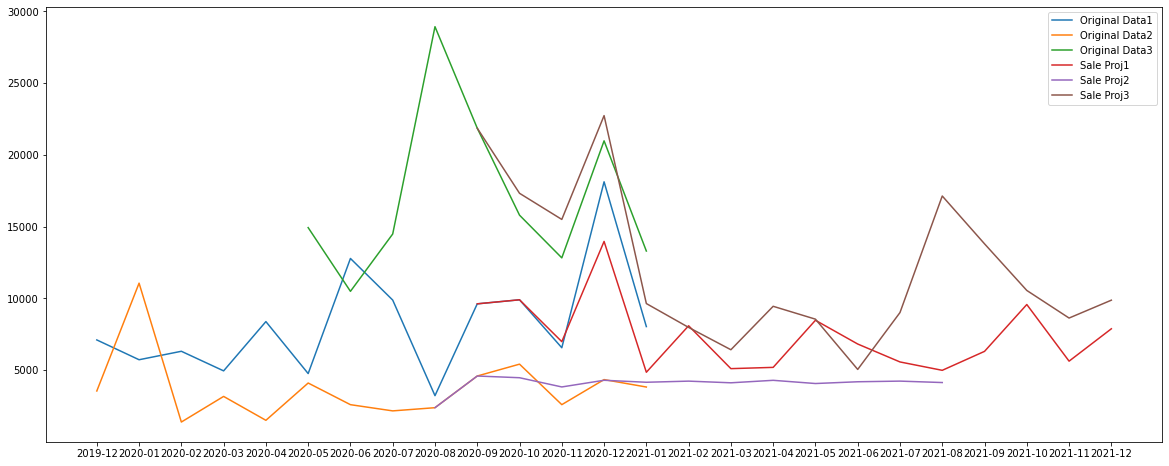

In [109]:
plt.figure(figsize=(20,8))
plt.plot(ori1['sale_dollars'][95:115], label='Original Data1')
plt.plot(ori2['sale_dollars'][95:115], label='Original Data2')
plt.plot(ori3['sale_dollars'][95:115], label='Original Data3')

plt.plot(newdata['sale_dollars'][104:120], label='Sale Proj1')
plt.plot(newdata2['sale_dollars'][67:80], label='Sale Proj2')
plt.plot(newdata3['sale_dollars'][44:60], label='Sale Proj3')
plt.legend(loc='best')
plt.show()

In [110]:
rmsle = np.sqrt(mean_squared_log_error(ori1[105:], newdata[105:109]))
print('data1')
print(rmsle)
print(r2_score(ori1[105:], newdata[105:109]))
print('')

rmsle = np.sqrt(mean_squared_log_error(ori2[105:], newdata2[68:72]))
print('data2')
print(rmsle)
print(r2_score(ori2[105:], newdata2[69:73]))
print('')

rmsle = np.sqrt(mean_squared_log_error(ori3[100:], newdata3[45:49]))
print('data3')
print(rmsle)
print(r2_score(ori3[100:], newdata3[45:49]))
print('')

data1
0.2852207704511299
0.6552353349355097

data2
0.29623938017807006
0.3862603935036055

data3
0.19642501155336384
0.38002068867084715



### Check Volume Sales by Sub-Category Forecast

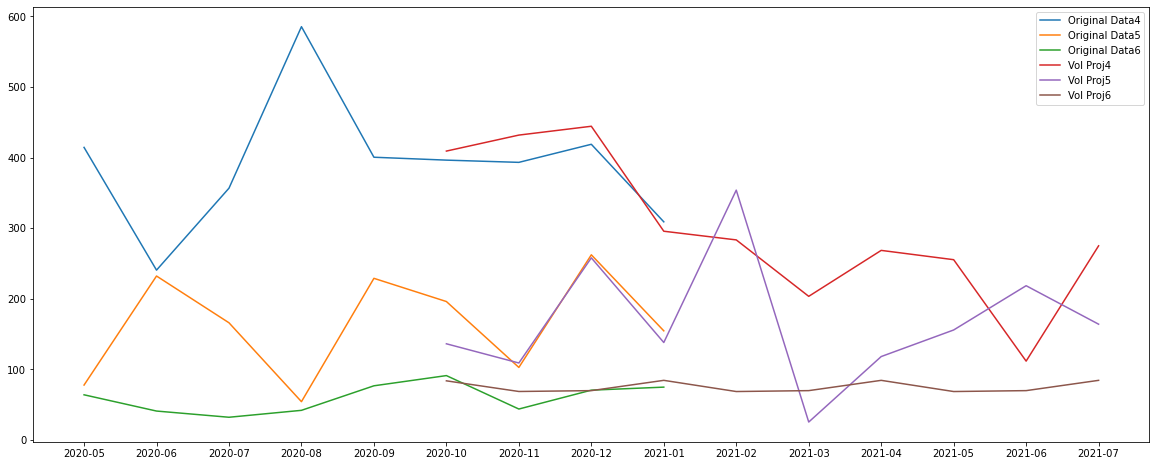

In [111]:
plt.figure(figsize=(20,8))
plt.plot(ori4['volume_sold_gallons'][95:104], label='Original Data4')
plt.plot(ori5['volume_sold_gallons'][100:109], label='Original Data5')
plt.plot(ori6['volume_sold_gallons'][100:109], label='Original Data6')

plt.plot(newdata4['volume_sold_gallons'][33:43], label='Vol Proj4')
plt.plot(newdata5['volume_sold_gallons'][57:67], label='Vol Proj5')
plt.plot(newdata6['volume_sold_gallons'][69:79], label='Vol Proj6')
plt.legend(loc='best')
plt.show()

In [112]:
rmsle = np.sqrt(mean_squared_log_error(ori4[100:], newdata4[33:37]))
print('data4')
print(rmsle)
print(r2_score(ori4[100:], newdata4[33:37]))
print('')

rmsle = np.sqrt(mean_squared_log_error(ori5[105:], newdata5[57:61]))
print('data5')
print(rmsle)
print(r2_score(ori5[105:], newdata5[57:61]))
print('')

rmsle = np.sqrt(mean_squared_log_error(ori6[105:], newdata6[69:73]))
print('data6')
print(rmsle)
print(r2_score(ori6[105:], newdata6[69:73]))
print('')

data4
0.061594154149262156
0.6444537791073139

data5
0.1921679638480258
0.7128941617701179

data6
0.2331386278733791
0.3387806229602548



### Check Volume Sales Forecast

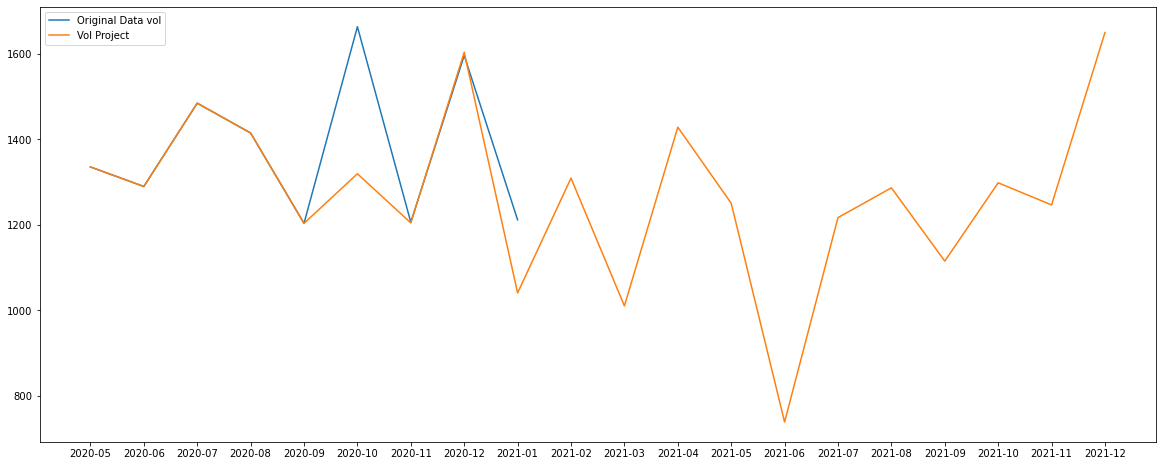

data vol
0.1385452382870839
-0.242918372298075



In [113]:
plt.figure(figsize=(20,8))
plt.plot(orivol['volume_sold_gallons'][100:109], label='Original Data vol')

plt.plot(newdatavol['volume_sold_gallons'][100:120], label='Vol Project')
plt.legend(loc='best')
plt.show()

rmsle = np.sqrt(mean_squared_log_error(orivol[105:], newdatavol[105:109]))
print('data vol')
print(rmsle)
print(r2_score(orivol[105:], newdatavol[69:73]))
print('')

# Final Forecast

# 2021 TimeSeries

### Fit Model

In [116]:
model1_2021 = SARIMAX(ori1, seasonal_order=(1,1,2,12)).fit(disp = 0)
model2_2021 = SARIMAX(ori2, seasonal_order=(1,1,2,3)).fit(disp = 0)
model3_2021 = SARIMAX(ori3, seasonal_order=(1,0,1,12)).fit(disp = 0)

model4_2021 = SARIMAX(ori4, seasonal_order=(0,0,1,12)).fit(disp = 0)
model5_2021 = SARIMAX(ori5, seasonal_order=(2,2,0,12)).fit(disp = 0)
model6_2021 = SARIMAX(ori6, seasonal_order=(0,1,1,3)).fit(disp = 0)

modelvol_2021 = SARIMAX(orivol, seasonal_order=(0,1,1,3)).fit(disp = 0)
# print(model1.summary())
# print(model2.summary())
# print(model3.summary())

# print(model4.summary())
# print(model5.summary())
# print(model6.summary())

In [117]:
new_2021 = pd.DataFrame(index = [x for x in pd.date_range("02-2021", "01-2022", freq='M')], data = {"sale_dollars" : [x for x in model1_2021.predict(start = 109, end = 119 , dynamic = False, typ = "levels")]})
newdata_2021 = pd.concat([ori1, new_2021], axis = 0)

newdata_2021.index = pd.to_datetime(newdata_2021.index)
newdata_2021 = newdata_2021.reset_index()
newdata_2021['index'] = newdata_2021['index'].apply(lambda x: x.strftime('%Y-%m'))
newdata_2021.set_index('index', inplace=True)


new2_2021 = pd.DataFrame(index = [x for x in pd.date_range("02-2021", "01-2022", freq='M')], data = {"sale_dollars" : [x for x in model2_2021.predict(start = 109, end = 119 , dynamic = False, typ = "levels")]})
newdata2_2021 = pd.concat([ori2, new2_2021], axis = 0)

newdata2_2021.index = pd.to_datetime(newdata2_2021.index)
newdata2_2021 = newdata2_2021.reset_index()
newdata2_2021['index'] = newdata2_2021['index'].apply(lambda x: x.strftime('%Y-%m'))
newdata2_2021.set_index('index', inplace=True)


new3_2021 = pd.DataFrame(index = [x for x in pd.date_range("02-2021", "01-2022", freq='M')], data = {"sale_dollars" : [x for x in model3_2021.predict(start = 104, end = 114 , dynamic = False, typ = "levels")]})
newdata3_2021 = pd.concat([ori3, new3_2021], axis = 0)

newdata3_2021.index = pd.to_datetime(newdata3_2021.index)
newdata3_2021 = newdata3_2021.reset_index()
newdata3_2021['index'] = newdata3_2021['index'].apply(lambda x: x.strftime('%Y-%m'))
newdata3_2021.set_index('index', inplace=True)




new4_2021 = pd.DataFrame(index = [x for x in pd.date_range("02-2021", "01-2022", freq='M')], data = {"volume_sold_gallons" : [x for x in model4_2021.predict(start = 104, end = 114 , dynamic = False, typ = "levels")]})
newdata4_2021 = pd.concat([ori4, new4_2021], axis = 0)

newdata4_2021.index = pd.to_datetime(newdata4_2021.index)
newdata4_2021 = newdata4_2021.reset_index()
newdata4_2021['index'] = newdata4_2021['index'].apply(lambda x: x.strftime('%Y-%m'))
newdata4_2021.set_index('index', inplace=True)


new5_2021 = pd.DataFrame(index = [x for x in pd.date_range("02-2021", "01-2022", freq='M')], data = {"volume_sold_gallons" : [x for x in model5_2021.predict(start = 109, end = 119 , dynamic = False, typ = "levels")]})
newdata5_2021 = pd.concat([ori5, new5_2021], axis = 0)

newdata5_2021.index = pd.to_datetime(newdata5_2021.index)
newdata5_2021 = newdata5_2021.reset_index()
newdata5_2021['index'] = newdata5_2021['index'].apply(lambda x: x.strftime('%Y-%m'))
newdata5_2021.set_index('index', inplace=True)


new6_2021 = pd.DataFrame(index = [x for x in pd.date_range("02-2021", "01-2022", freq='M')], data = {"volume_sold_gallons" : [x for x in model6_2021.predict(start = 109, end = 119 , dynamic = False, typ = "levels")]})
newdata6_2021 = pd.concat([ori6, new6_2021], axis = 0)

newdata6_2021.index = pd.to_datetime(newdata6_2021.index)
newdata6_2021 = newdata6_2021.reset_index()
newdata6_2021['index'] = newdata6_2021['index'].apply(lambda x: x.strftime('%Y-%m'))
newdata6_2021.set_index('index', inplace=True)



newvol_2021 = pd.DataFrame(index = [x for x in pd.date_range("02-2021", "01-2022", freq='M')], data = {"volume_sold_gallons" : [x for x in modelvol_2021.predict(start = 109, end = 119 , dynamic = False, typ = "levels")]})
newdatavol_2021 = pd.concat([orivol, newvol_2021], axis = 0)

newdatavol_2021.index = pd.to_datetime(newdatavol_2021.index)
newdatavol_2021 = newdatavol_2021.reset_index()
newdatavol_2021['index'] = newdatavol_2021['index'].apply(lambda x: x.strftime('%Y-%m'))
newdatavol_2021.set_index('index', inplace=True)

## Revenue Forecast by Sub-Category

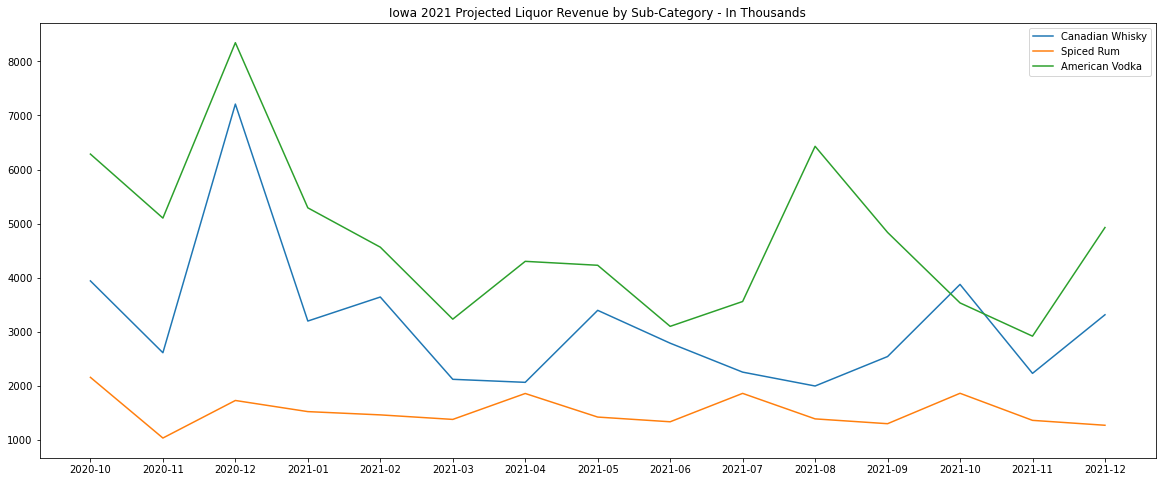

In [118]:
plt.figure(figsize=(20,8))
plt.plot((newdata_2021['sale_dollars'][105:120]*0.3979), label='Canadian Whisky') #*0.3979 --> Make Exactly 1/1000 Real Case
plt.plot((newdata2_2021['sale_dollars'][105:120]*0.3979), label='Spiced Rum')
plt.plot((newdata3_2021['sale_dollars'][100:115]*0.3979), label='American Vodka')
plt.legend(loc='best')
plt.title('Iowa 2021 Projected Liquor Revenue by Sub-Category - In Thousands')
plt.show()

## Volume Forecast by Sub-Category

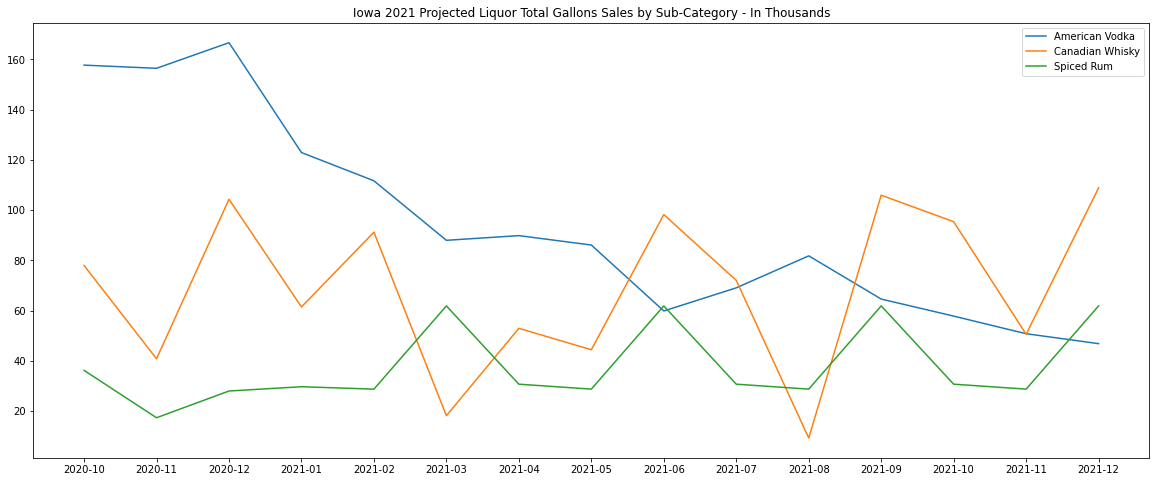

In [119]:
plt.figure(figsize=(20,8))
plt.plot((newdata4_2021['volume_sold_gallons'][100:115]*0.3979), label='American Vodka')
plt.plot((newdata5_2021['volume_sold_gallons'][105:120]*0.3979), label='Canadian Whisky')
plt.plot((newdata6_2021['volume_sold_gallons'][105:120]*0.3979), label='Spiced Rum')
plt.legend(loc='best')
plt.title('Iowa 2021 Projected Liquor Total Gallons Sales by Sub-Category - In Thousands')
plt.show()

# Volume Forecast

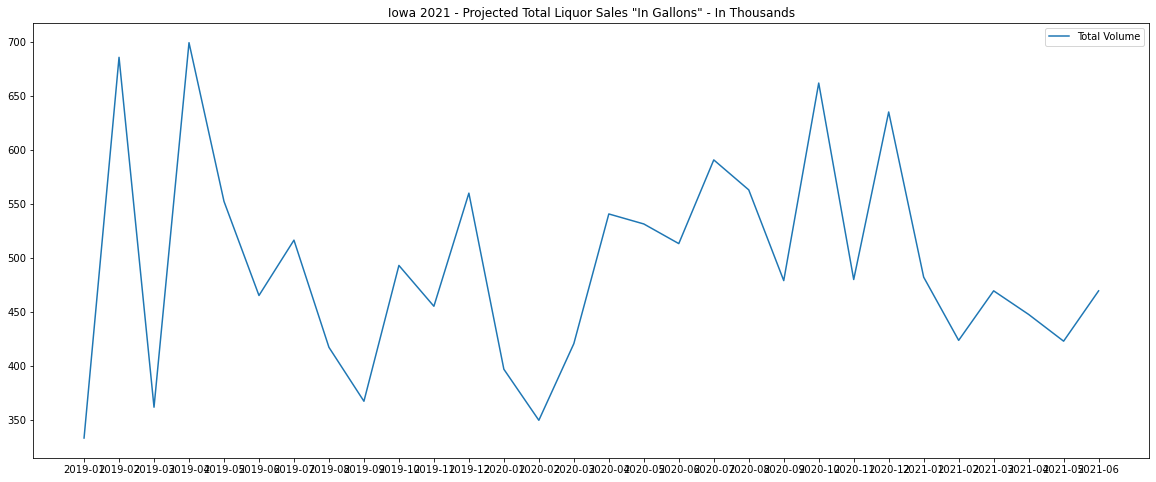

In [146]:
plt.figure(figsize=(20,8))

plt.plot((newdatavol_2021['volume_sold_gallons'][84:114]*0.3979), label='Total Volume')
plt.legend(loc='best')
plt.title('Iowa 2021 - Projected Total Liquor Sales "In Gallons" - In Thousands')
plt.show()